# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
cast = pd.read_csv('/Users/jaykishanpanjiyar/OIM_7502_classwork/data/cast.csv')
release_dates = pd.read_csv('/Users/jaykishanpanjiyar/OIM_7502_classwork/data/release_dates.csv')
titles = pd.read_csv('/Users/jaykishanpanjiyar/OIM_7502_classwork/data/titles.csv')

# Convert 'date' to datetime objects in release_dates for later use
release_dates['date'] = pd.to_datetime(release_dates['date'])

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [36]:
print("--- titles.csv Assessment ---")
print(titles.info())
print(f"Number of records: {len(titles)}")

print("\n--- cast.csv Assessment ---")
print(cast.info())
print(f"Number of records: {len(cast)}")

print("\n--- release_dates.csv Assessment ---")
print(release_dates.info())
print(f"Number of records: {len(release_dates)}")

--- titles.csv Assessment ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None
Number of records: 226013

--- cast.csv Assessment ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None
Number of records: 3442902

--- release_dates.csv Assessment ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ---

### 2. How many movies have the title North by Northwest

In [38]:
north_by_northwest_count = titles[titles['title'] == 'North by Northwest'].shape[0]
print(f"Number of movies titled 'North by Northwest': {north_by_northwest_count}")

Number of movies titled 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [39]:
hamlet = titles[titles['title'] == 'Hamlet']
hamlet_count = hamlet.shape[0]
first_hamlet_year = hamlet['year'].min()
last_hamlet_year = hamlet['year'].max()

print(f"Number of versions of 'Hamlet': {hamlet_count}")
print(f"Year of the first 'Hamlet': {first_hamlet_year}")
print(f"Year of the last 'Hamlet': {last_hamlet_year}")

Number of versions of 'Hamlet': 20
Year of the first 'Hamlet': 1910
Year of the last 'Hamlet': 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [40]:
treasure_island = titles[titles['title'] == 'Treasure Island'].sort_values('year')
print(treasure_island)

                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [41]:
movies_1950 = titles[titles['year'] == 1950].shape[0]
movies_1980 = titles[titles['year'] == 1980].shape[0]
movies_2000 = titles[titles['year'] == 2000].shape[0]

print(f"Movies made in 1950: {movies_1950}")
print(f"Movies made in 1980: {movies_1980}")
print(f"Movies made in 2000: {movies_2000}")

Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


This growth reflects the expansion of the global film industry, including:

- Broader access to filmmaking technology,
- Growth of international markets,
- Rising demand for entertainment content, and
- Lower production and distribution barriers (especially with digital media).

Overall, the trend indicates that film production has accelerated steadily over the decades.

### 6. How big was the cast of Metropolis


In [42]:
# Assuming the most famous version is the 1927 film
metropolis_title = 'Metropolis'
metropolis_year = 1927

# Filter the cast DataFrame for the specific title and year
metropolis_cast = cast[
    (cast['title'] == metropolis_title) & 
    (cast['year'] == metropolis_year)
]

cast_size = metropolis_cast.shape[0]

print(f"The cast size of '{metropolis_title}' ({metropolis_year}) was: {cast_size}")

The cast size of 'Metropolis' (1927) was: 33


### 7. How many roles for actors were there 1950's? 1990's

In [43]:
# Roles in the 1950s (1950-1959)
roles_1950s = cast[
    (cast['year'] >= 1950) & 
    (cast['year'] <= 1959) & 
    (cast['type'] == 'actor')
].shape[0]

# Roles in the 1990s (1990-1999)
roles_1990s = cast[
    (cast['year'] >= 1990) & 
    (cast['year'] <= 1999) & 
    (cast['type'] == 'actor')
].shape[0]

print(f"Number of roles for actors in the 1950s (1950-1959): {roles_1950s}")
print(f"Number of roles for actors in the 1990s (1990-1999): {roles_1990s}")

Number of roles for actors in the 1950s (1950-1959): 153559
Number of roles for actors in the 1990s (1990-1999): 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

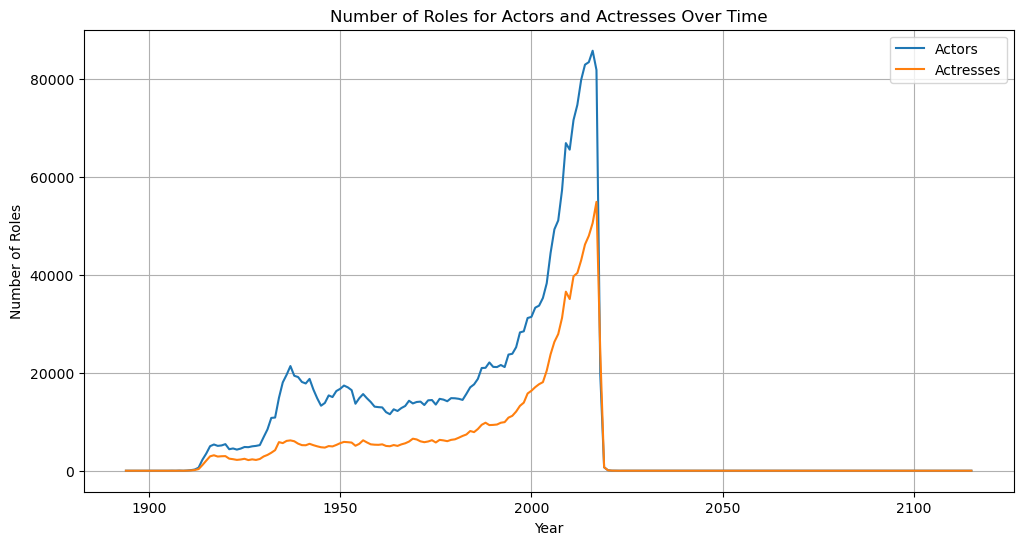

In [44]:
import matplotlib.pyplot as plt
# Group by year and type, then unstack to separate 'actor' and 'actress' into columns
roles_by_year = cast.groupby(['year', 'type']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(roles_by_year.index, roles_by_year['actor'], label='Actors')
plt.plot(roles_by_year.index, roles_by_year['actress'], label='Actresses')
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [45]:
# Define the decade and leading role ranks
start_year = 2000
end_year = 2009
leading_ranks = [1, 2]

leading_roles_2000s = cast[
    (cast['year'] >= start_year) & 
    (cast['year'] <= end_year) & 
    (cast['n'].isin(leading_ranks))
].shape[0]

print(f"Number of leading roles (n=1 or n=2) in the {start_year}'s: {leading_roles_2000s}")

Number of leading roles (n=1 or n=2) in the 2000's: 45740


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [46]:
# Roles with no ranking in the 1950s (n is null)
roles_no_rank_1950s = cast[
    (cast['year'] >= 1950) & 
    (cast['year'] <= 1959) & 
    (cast['n'].isnull())
].shape[0]

# Roles with no ranking in the 2000s (n is null)
roles_no_rank_2000s = cast[
    (cast['year'] >= 2000) & 
    (cast['year'] <= 2009) & 
    (cast['n'].isnull())
].shape[0]

print(f"Roles with no ranking in the 1950s (1950-1959): {roles_no_rank_1950s}")
print(f"Roles with no ranking in the 2000s (2000-2009): {roles_no_rank_2000s}")

Roles with no ranking in the 1950s (1950-1959): 95406
Roles with no ranking in the 2000s (2000-2009): 232037


This sharp rise suggests:
- More films and larger casts were being produced in the 2000s compared to the 1950s.
- A growing proportion of unranked or minor roles, likely -reflecting the expansion of ensemble casts, extras, and background appearances.
- Increased data availability and recording of non-principal roles in modern film databases.

In short, the increase in unranked roles mirrors the growth and diversification of the film industry over time.

### 11. Plot the number of films made in each decade

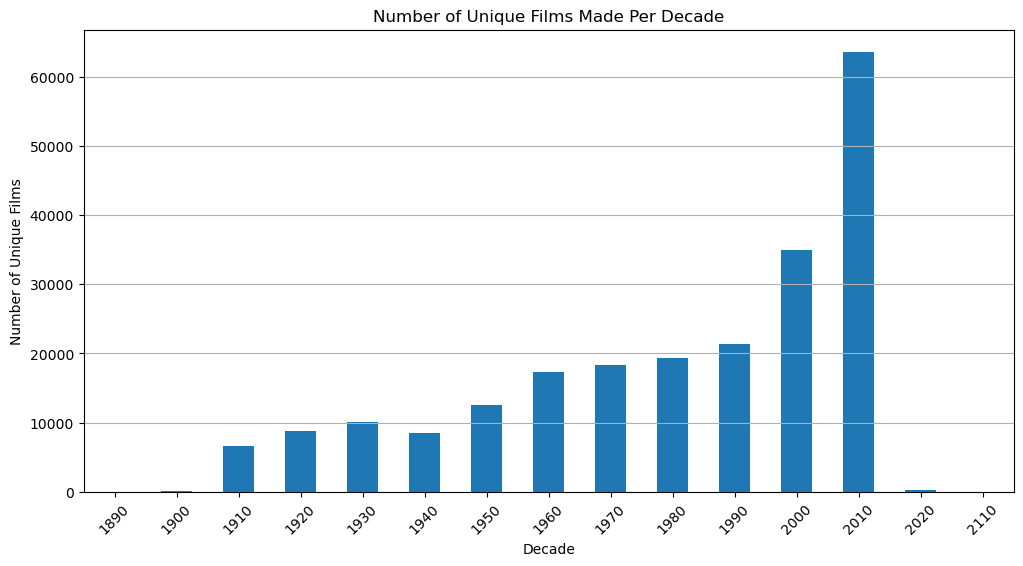

In [47]:
import matplotlib.pyplot as plt

# 1. Calculate the decade for each film
titles['decade'] = (titles['year'] // 10) * 10

# 2. Group by decade and count the number of unique titles
films_by_decade = titles.groupby('decade')['title'].nunique()

# 3. Create the bar plot
plt.figure(figsize=(12, 6))
films_by_decade.plot(kind='bar', title='Number of Unique Films Made Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Unique Films')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Use plt.show() or simply let the notebook display the output
plt.show()

### 12. Plot the number of films with a Rustler character over time

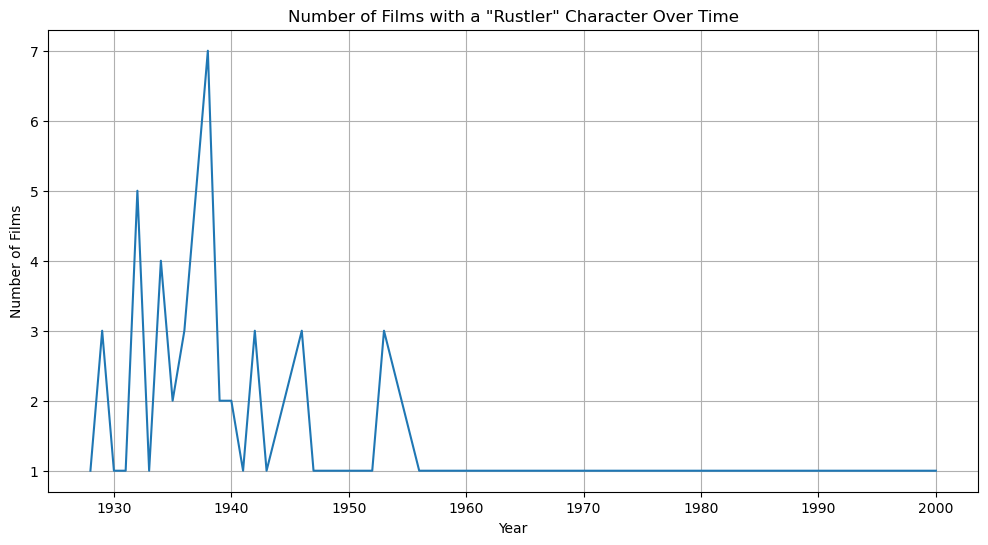

In [49]:
import matplotlib.pyplot as plt

# 1. Filter the cast DataFrame for roles that are exactly 'Rustler'
rustler_roles = cast[cast['character'] == 'Rustler']

# 2. Count the number of unique films (titles) that had a 'Rustler' character per year
films_with_rustler = rustler_roles.groupby('year')['title'].nunique()

# 3. Create the line plot
plt.figure(figsize=(12, 6))
films_with_rustler.plot(kind='line', title='Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()

### 13. What are the top ten character names of all time?

In [50]:
# Use the corrected column name 'character'
top_ten_chars = cast['character'].value_counts().head(10)
print("Top Ten Character Names of All Time:\n", top_ten_chars)

Top Ten Character Names of All Time:
 character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [52]:
# Define the decade (1990-1999) and the role type ('actor')
start_year = 1990
end_year = 1999
role_type = 'actor'

# 1. Filter for the 1990s and actors
cast_1990s_actors = cast[
    (cast['year'] >= start_year) & 
    (cast['year'] <= end_year) & 
    (cast['type'] == role_type)
]

# 2. Count unique films (titles) per actor
actor_film_counts = cast_1990s_actors.groupby('name')['title'].nunique()

# 3. Find the actor with the maximum unique film count
most_prolific_actor = actor_film_counts.idxmax()
film_count = actor_film_counts.max()

print(f"The actor who appeared in the most unique films in the 1990s is: {most_prolific_actor}")
print(f"Total unique films: {film_count}")

The actor who appeared in the most unique films in the 1990s is: Shakti Kapoor
Total unique films: 130


### 15. What are the top 10 roles that start with Science?

In [53]:
# 1. Filter the cast DataFrame for characters starting with 'Science'
# We use na=False to ensure we only search non-null character names.
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

# 2. Count the occurrences of each unique character name and take the top 10
top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 Roles Starting with 'Science':\n", top_science_roles)

Top 10 Roles Starting with 'Science':
 character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [54]:
# 1. Group the cast by film (title and year) and count the size of each group
cast_size_by_film = cast.groupby(['title', 'year']).size()

# 2. Find the film (index) that corresponds to the maximum cast size
largest_cast_film_index = cast_size_by_film.idxmax()

# 3. Retrieve the maximum cast size
cast_size = cast_size_by_film.max()

# The index is a tuple: (title, year)
largest_cast_title = largest_cast_film_index[0]
largest_cast_year = largest_cast_film_index[1]

print(f"The film with the largest cast is: {largest_cast_title} ({largest_cast_year})")
print(f"Cast size: {cast_size} members")

The film with the largest cast is: Around the World in 80 Days (1956)
Cast size: 1299 members


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [55]:
# 1. Group the cast by film (title and year) and count the size of each group
cast_size_by_film = cast.groupby(['title', 'year']).size()

# 2. Generate descriptive statistics on the series of cast sizes
cast_size_stats = cast_size_by_film.describe()
print(cast_size_stats)

count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64


- The mean cast size is approximately 18.9, while the median (50%) is 13, indicating a right-skewed distribution — a few films have very large casts that pull the average up.
- 25% of films have cast sizes of 6 or fewer, and 75% have 24 or fewer.
- The maximum cast size is extremely large (1,299), which likely represents films with huge ensemble casts, crowd scenes, or massive extras lists (e.g., historical epics or documentaries).
- The standard deviation (≈ 21.2) shows there’s high variability in cast sizes, most films are small to medium in scale, but a small number have very large casts

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [56]:
# 1. Filter for Natalie Portman's roles
natalie_portman_roles = cast[cast['name'] == 'Natalie Portman']

# 2. Group by year and count the number of unique titles (films)
films_per_year_portman = natalie_portman_roles.groupby('year')['title'].nunique()

print("Natalie Portman's Unique Film Count Per Year:\n")
print(films_per_year_portman)

Natalie Portman's Unique Film Count Per Year:

year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [57]:
# 1. Filter for Natalie Portman's roles
natalie_portman_roles = cast[cast['name'] == 'Natalie Portman']

# 2. Filter those roles further for leading/co-star rank (n=1 or n=2)
portman_leading_roles = natalie_portman_roles[
    (natalie_portman_roles['n'] == 1) | 
    (natalie_portman_roles['n'] == 2)
]

# 3. Group by year and count the number of unique titles (films) for these leading roles
leading_films_per_year_portman = portman_leading_roles.groupby('year')['title'].nunique()

print("Natalie Portman's Leading/Co-star Films Per Year:\n")
print(leading_films_per_year_portman)

Natalie Portman's Leading/Co-star Films Per Year:

year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Figure size 1200x600 with 0 Axes>

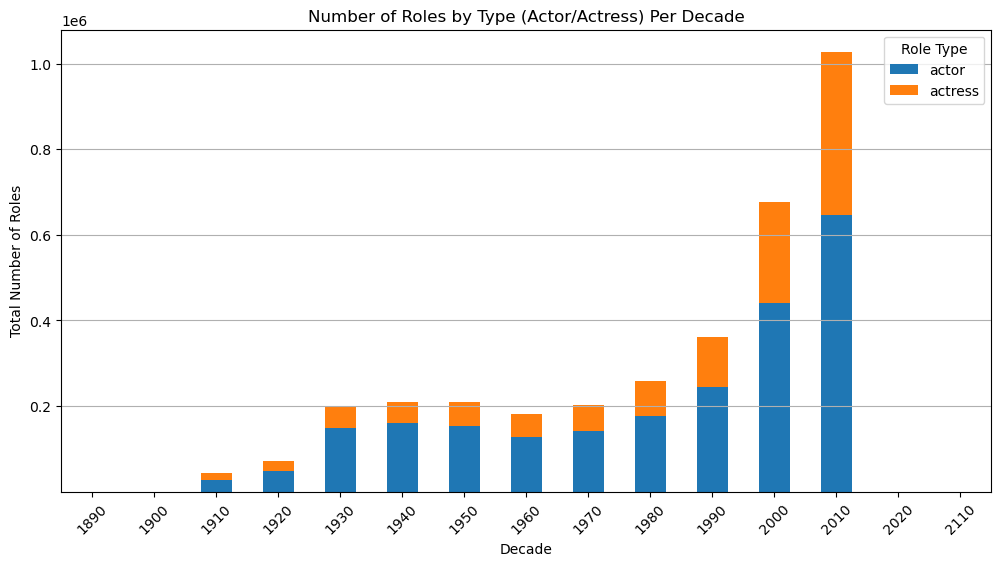

In [59]:
import matplotlib.pyplot as plt

# 1. Calculate the decade for each role

cast['decade'] = (cast['year'] // 10) * 10

# 2. Group by decade and type, then count the roles and unstack the 'type' column
roles_by_decade_type = cast.groupby(['decade', 'type']).size().unstack(fill_value=0)

# 3. Create the stacked bar chart
plt.figure(figsize=(12, 6))
roles_by_decade_type.plot(kind='bar', stacked=True, figsize=(12, 6), 
                          title='Number of Roles by Type (Actor/Actress) Per Decade')
plt.xlabel('Decade')
plt.ylabel('Total Number of Roles')
plt.xticks(rotation=45)
plt.legend(title='Role Type')
plt.grid(axis='y')
plt.show() # Display the plot inline

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [60]:
import pandas as pd
import numpy as np


release_dates['date'] = pd.to_datetime(release_dates['date'], errors='coerce') 

# Exclude data that doesn't make sense (i.e., data from the future)
# We assume the analysis should stop at the end of the current year (2025).
current_year = pd.Timestamp.now().year
future_date = pd.to_datetime(f'{current_year}-12-31')
clean_release_dates = release_dates[release_dates['date'] <= future_date].copy()

# Extract day of the week and month names
clean_release_dates['day_of_week'] = clean_release_dates['date'].dt.day_name()
clean_release_dates['month'] = clean_release_dates['date'].dt.month_name()

# Pivot table to count releases by month (index) and day of week (columns)
release_pivot = pd.pivot_table(
    clean_release_dates, 
    index='month', 
    columns='day_of_week', 
    values='title', 
    aggfunc='count',
    fill_value=0
)

# Reorder columns (days of the week) chronologically for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
release_pivot = release_pivot.reindex(columns=day_order, fill_value=0)

# Reorder index (months) chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
release_pivot = release_pivot.reindex(index=month_order, fill_value=0)

print(release_pivot)

day_of_week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
month                                                                      
January        3699     1823       4663     10746   13734      2925    1822
February       3138     1190       4118     10356   13833      2395    1277
March          3383     1313       4479     11844   15268      2742    1228
April          3168     1446       4650     10625   13559      2868    1358
May            3050     1377       4289     10100   13198      2270    1165
June           2337     1179       4282      9469   11997      2409    1031
July           2267     1144       4243      8947   11635      2291     894
August         2844     1121       4270      9931   13430      2277    1138
September      3161     1309       4161     10713   14523      2551    1332
October        3551     1542       4605     11490   14893      2700    1423
November       3371     1415       4582     10859   14084      2546    1342
December    

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

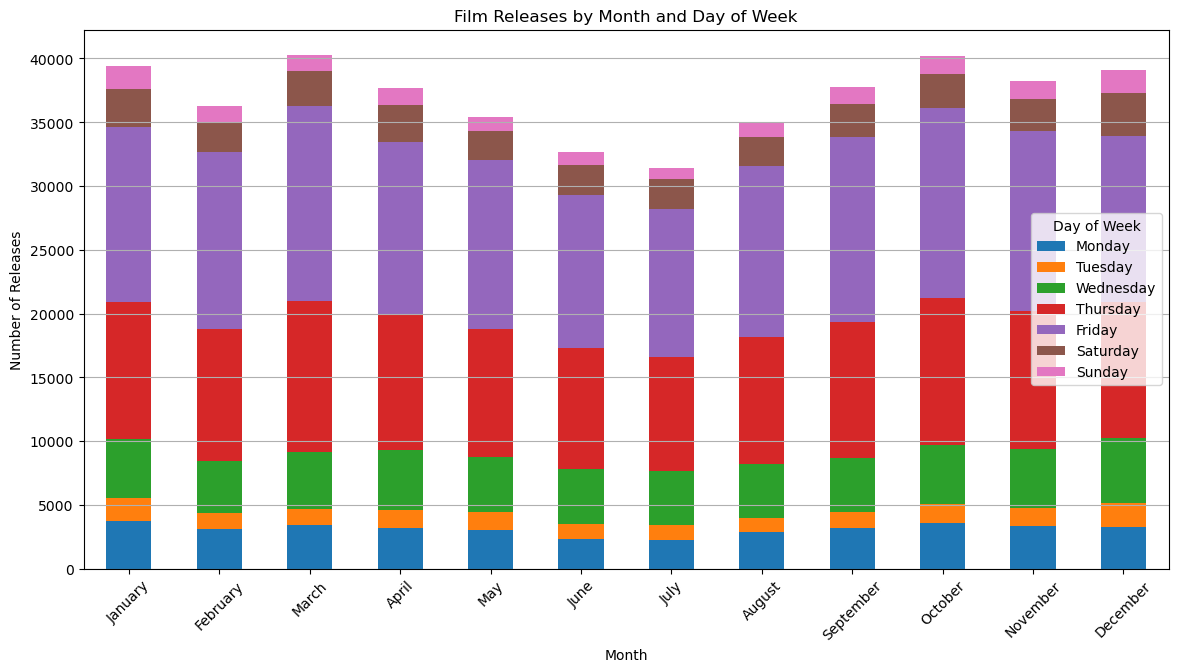

In [63]:
import matplotlib.pyplot as plt

# Re-use the release_pivot table generated in Question 21

# Create the stacked bar chart

release_pivot.plot(kind='bar', stacked=True, figsize=(14, 7), 
                   title='Film Releases by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Day of Week')
plt.grid(axis='y')
plt.show()

The pivot table itself is correct. 

### 23. What films did actors in Star Wars go on to appear in? 

In [62]:
# Identify the 1977 Star Wars film robustly
sw1977 = cast[
    cast['title'].str.match(r'^Star Wars', na=False) & (cast['year'] == 1977)
]

# Actors/actresses in that film
sw_people = sw1977.loc[sw1977['type'].isin(['actor', 'actress']), 'name'].unique()

# Films those people appeared in AFTER 1977 (exclude Star Wars titles and ensure actor/actress)
follow_on = cast[
    cast['name'].isin(sw_people)
    & cast['type'].isin(['actor', 'actress'])
    & (cast['year'] > 1977)
    & ~cast['title'].str.match(r'^Star Wars', na=False)
].copy()

# 1) The films (unique, sorted by year)
subsequent_films = follow_on[['title', 'year']].drop_duplicates().sort_values('year')
print(f"Unique follow-on films after 1977: {len(subsequent_films)}")
print(subsequent_films.head(50))  # preview; remove head() to print all

# 2) Who was most prolific after 1977 (by unique films)?
prolific_after = (follow_on.groupby('name')['title']
                  .nunique()
                  .sort_values(ascending=False)
                  .head(20))
print("\nTop 20 Star Wars (1977) actors by unique films AFTER 1977:")
print(prolific_after)


Unique follow-on films after 1977: 517
                                         title  year
661969                  Force 10 from Navarone  1978
281989                         A Hitch in Time  1978
263969                                Superman  1978
2124677                            Loose Shoes  1978
3185170                   International Velvet  1978
893403                           The Big Sleep  1978
662009                               Sweeney 2  1978
2022064         The Chant of Jimmie Blacksmith  1978
2022065         The King of the Two Day Wonder  1978
480384                         Bruges-La-Morte  1978
662031                   The Thirty-Nine Steps  1978
480397                   The Lord of the Rings  1978
110047                           Wombling Free  1978
281991                          Let's Get Laid  1978
1759246                   Warlords of Atlantis  1978
838214                            Rupan sansei  1978
848920                         Corvette Summer  1978
1358440